In [ ]:
# Collected DATA
# Data Cleaning - Misisng value imputation/ Outliers treatment/ Type conversion
# EDA - insights, patterns
# Making Data more structured --> Dummy variables/ Feature engineering


# ML
# annual sal,  designation, exp , financial growth in 5 years, industry, education                            ---> percent of loan to be approved
#                                                                                         regression algo     ---> 5, 50, 20,30,60,45,56,78, 1-100
#                                                                                         classification algo ---> approved/ not apporved
# ---------------------------------------------
# Finding Important variables
# Making Train and Test Data
# Training the algorithm



######################################################
# SK-Learn - scikit-learn

# 1) Supervised Learning : Data(input) & Label(Target)

#     regression algo --> Linear Regressio, KNN Regressor, Decision Tree Regressor, 
#                         Random Forest Regressor, Lassor Ridge Regression

#     classification algo  --> Logistic Regrssion, KNN Classifier, Decision Tree Classifier, 
#                               Random Forest Classifier, Naive Bayes Classifier, SVM Classifier

# 2) Unsupervised Learnig:
#   Clustering Algo -  K means, Apriori  algo
 



In [ ]:
# Equation Linear Regression

# Raw Data  - 35 features
# select - 10 features for Linear Regression than coefficients will be calculated for only these 10 features not for the remaining features

# predicted Y = Intercept(Beta0) + (coeff. X1(Beta1)  *  Value of X1) + (coeff. X2(Beta2)  *  Value of X2) + .....+ (coeff. XN  *  Value of XN)


# Linear Regression with Python

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [ ]:
import pandas as pd
import numpy as np

# data visualisation - graphs
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 


# helps to visualise graph in same notebook

In [ ]:
# np.set_printoptions(suppress=True,precision=2)

In [ ]:
USAhousing = pd.read_csv('USA_Housing.csv') # file and code has to be in same folder

USAhousing=USAhousing.drop('Address', axis=1).round(1) # Coverting data into Integer form
# USAhousing=USAhousing.drop('Address', axis=1).astype(int) # rounding off values to 1 decimal place 


# USAhousing = pd.read_csv(r'C:USERS\PYTHON\ML\LINEAR_REGRESION\USA_Housing.csv') # path is given to read

In [ ]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   object 
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 234.5+ KB


In [ ]:
USAhousing.describe() # give statistical answers only  - by default ansers for numeric columns only

# upper cap outlier - big values == q3+(1.5*IQR) < bigger outlier
# lower cap outliers - lower values == q1-(1.5*IQR) > lower outlier  
# IQR - Inter Quartile Range - Q3-Q1   (75%-25%)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108960,5.977000,6.988120,3.980480,36163.516440,1.232073e+06
std,10657.991502,0.992032,1.006347,1.235255,9925.650505,3.531176e+05
min,17796.600000,2.600000,3.200000,2.000000,172.600000,1.593870e+04
25%,61480.550000,5.300000,6.300000,3.100000,29403.950000,9.975771e+05
50%,68804.300000,6.000000,7.000000,4.000000,36199.400000,1.232669e+06
75%,75783.300000,6.700000,7.700000,4.500000,42861.325000,1.471210e+06
max,107701.700000,9.500000,10.800000,6.500000,69621.700000,2.469066e+06


In [ ]:
USAhousing.iloc[:,0].max()

107701.7

In [ ]:
USAhousing['Price'].max()

2469065.6

In [ ]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

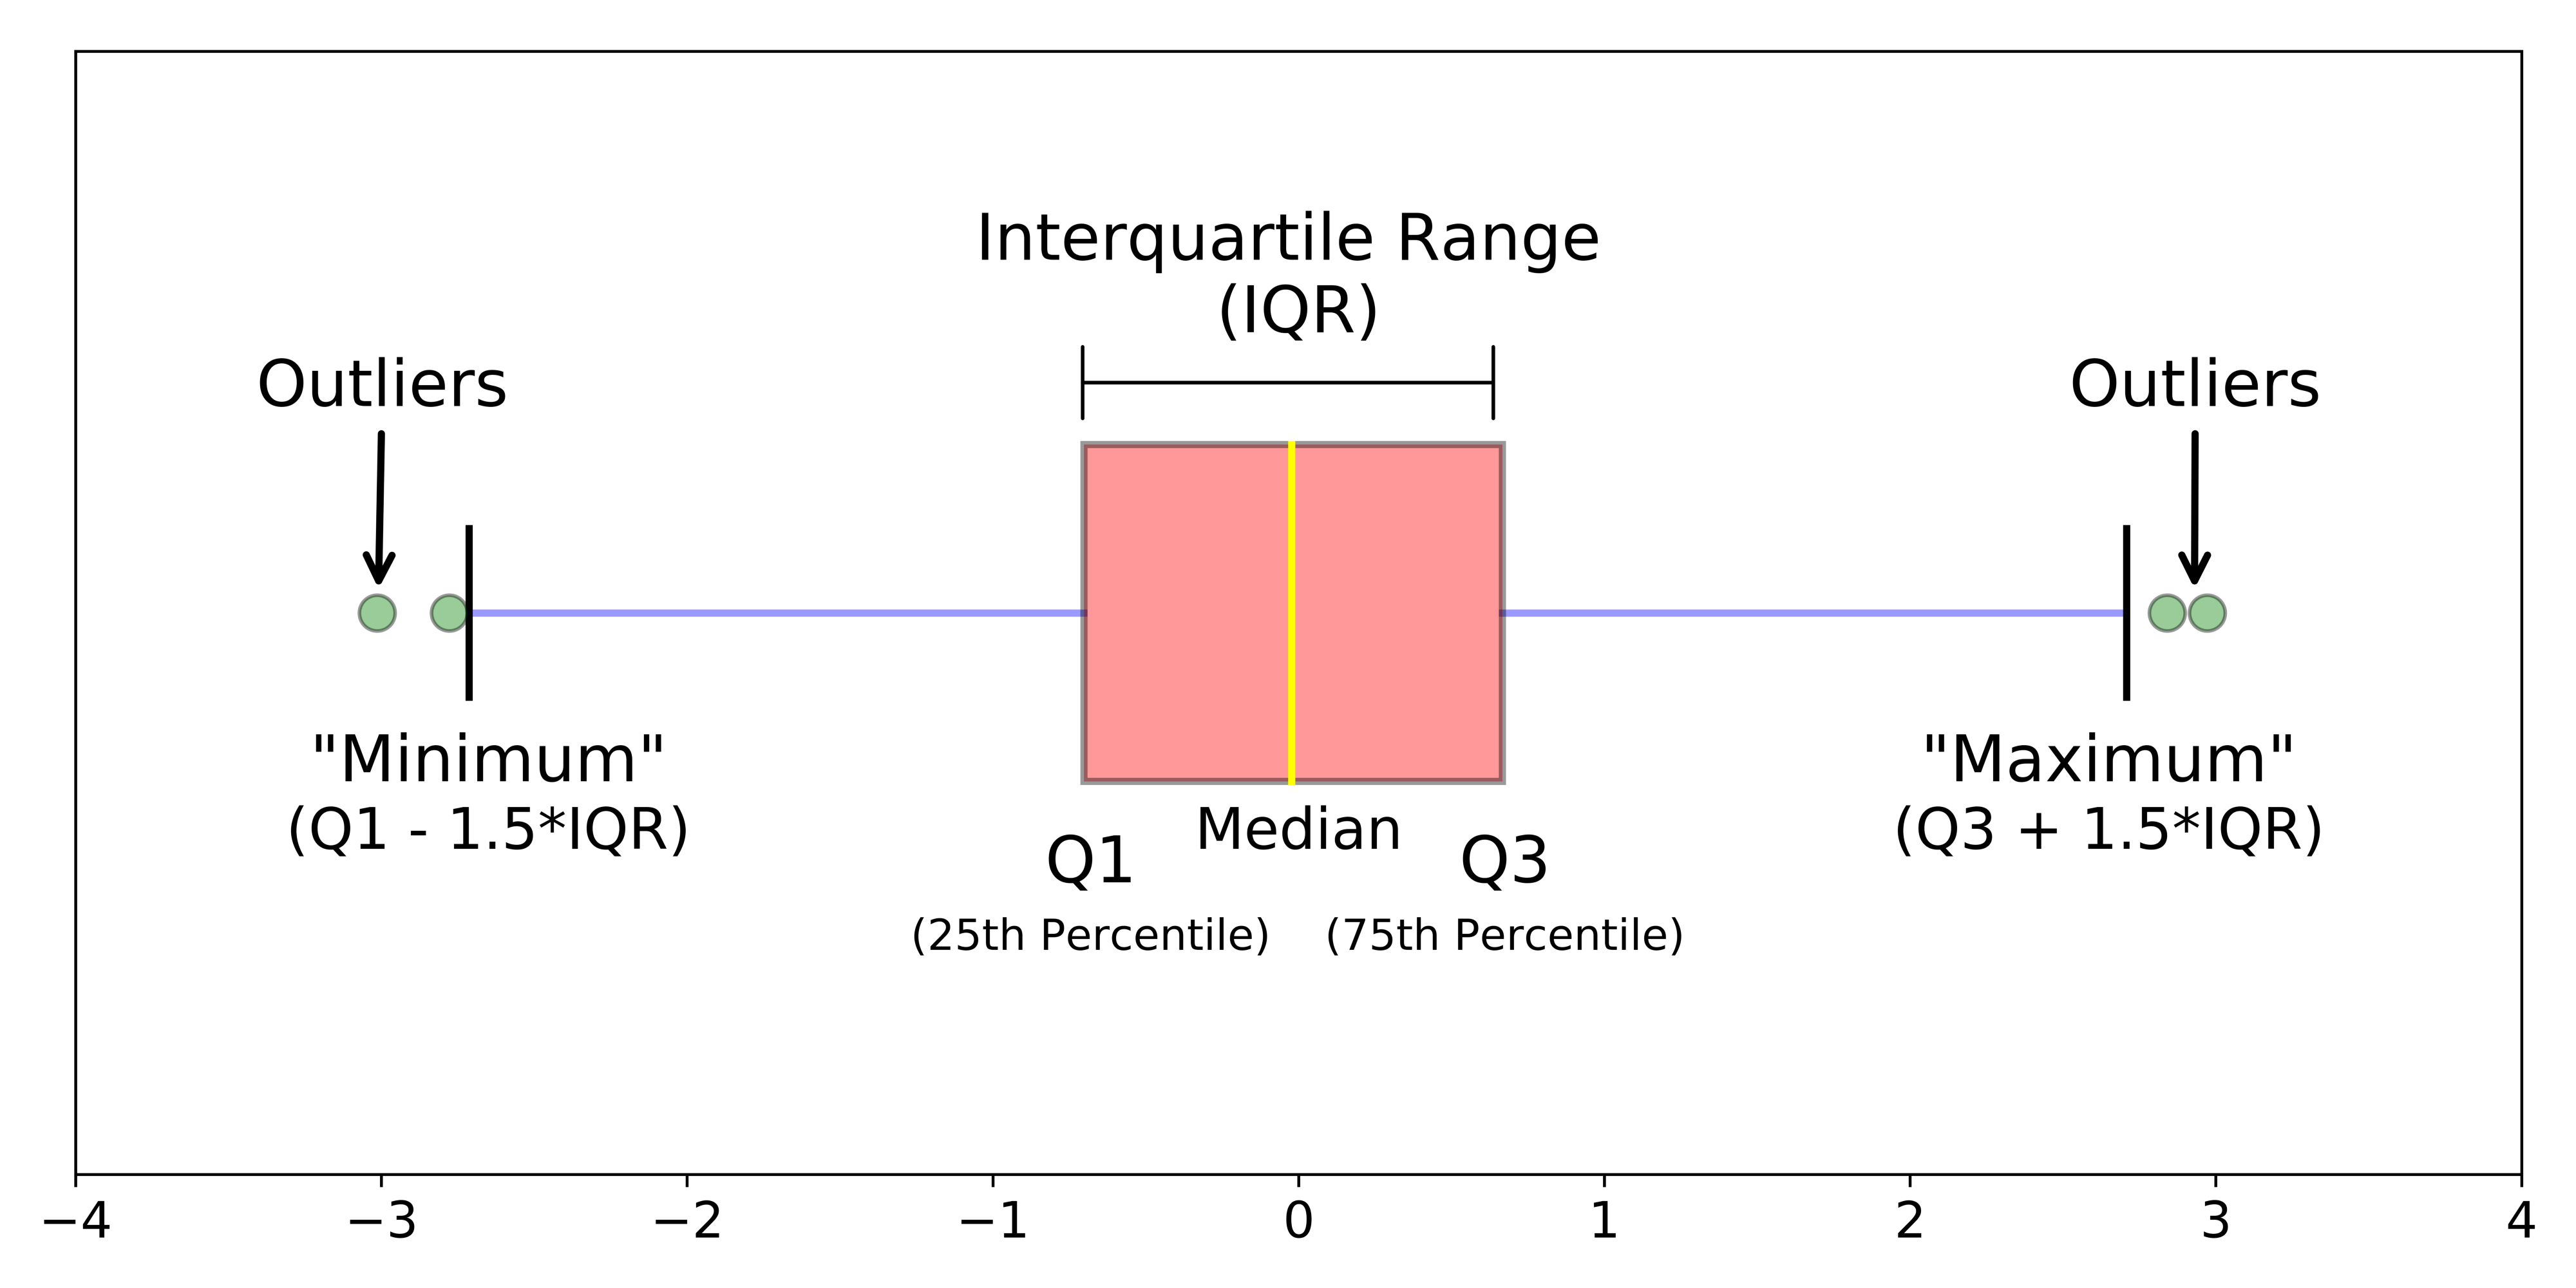

In [ ]:
# every col. find outlier -- box plot
# overwrite the outlier values using (lambda/ where)on the column having outliers

In [ ]:
def del_outlier(columns, data):
  for column_name in columns:
    fig=plt.figure(figsize=(16,4))
    sns.boxplot(x = data[column_name])
    plt.show()
    
    q1 = data[column_name].quantile(0.25)
    q2 = data[column_name].quantile(0.50)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    
    min_val = q1 - 1.5 * iqr
    max_val = q3 + 1.5 * iqr
    data[column_name] = np.where(data[column_name]  > max_val, q2, data[column_name] )
    data[column_name] = np.where(data[column_name]  < min_val, q2, data[column_name] )  

  return data  

new_data =  del_outlier(USAhousing.drop(['Price','Address'], axis=1).columns, USAhousing)

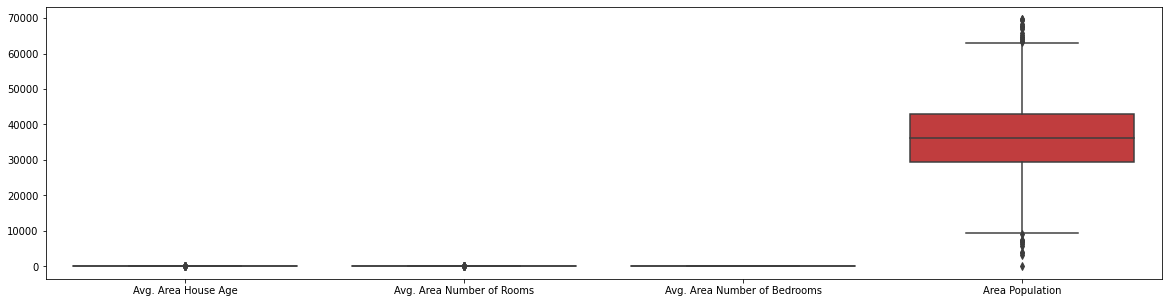

In [ ]:
fig = plt.figure(figsize=(20,5))
us=USAhousing.drop('Price', axis=1)
sns.boxplot( data = us)

In [ ]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.5,5.7,7.0,4.1,23086.8,1059033.6
1,79248.6,6.0,6.7,3.1,40173.1,1505890.9
2,61287.1,5.9,8.5,5.1,36882.2,1058988.0
3,63345.2,7.2,5.6,3.3,34310.2,1260616.8
4,59982.2,5.0,7.8,4.2,26354.1,630943.5


# EDA

Let's create some simple plots to check out the data!

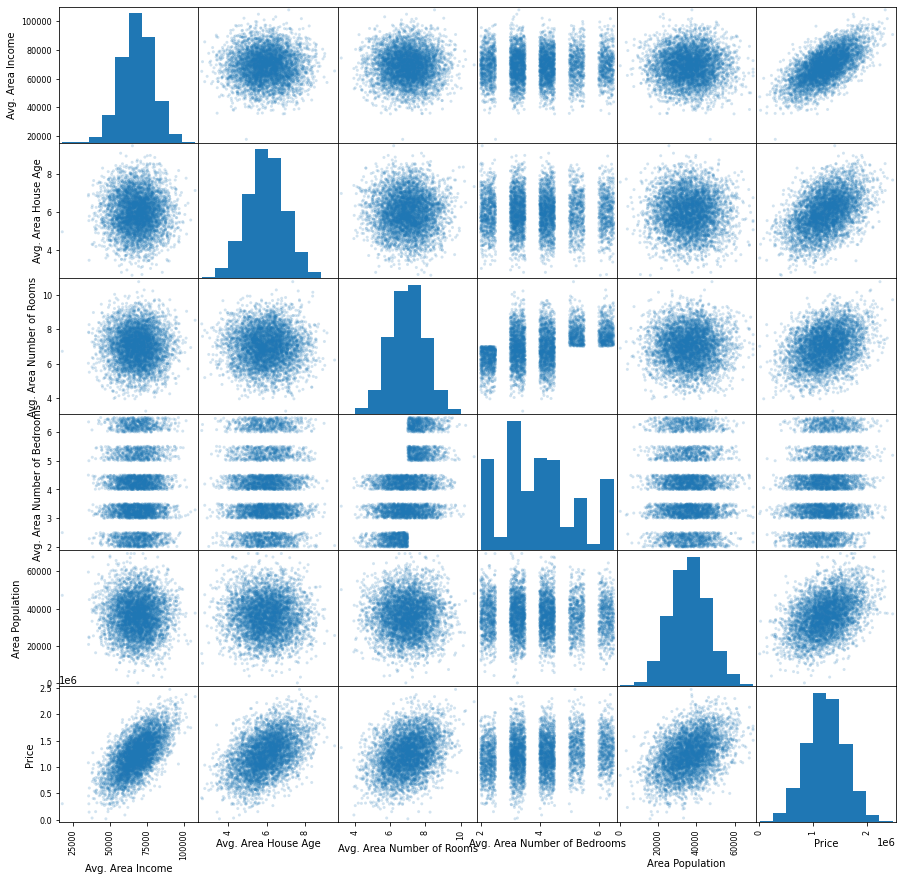

In [ ]:
pd.plotting.scatter_matrix(USAhousing ,alpha=0.2, figsize=(15, 15) ,diagonal='hist');

In [ ]:
USAhousing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


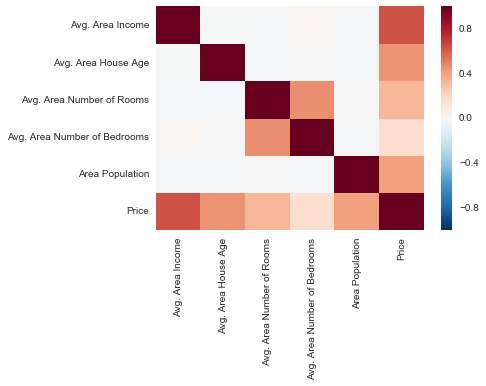

In [ ]:
sns.heatmap(USAhousing.corr())

# Look 4 missing values - treat them
# Look 4 Outlier values - treat them

# m/F, 0/1, text, [1,2,3,4]

In [ ]:
# IDENTIFY FEATURES w.r.t Model
# CReate Train Data and Test Data  



## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [ ]:
USAhousing.corr()

,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area House Age,1.000000,-0.009916,0.005621,-0.018306,0.452108
Avg. Area Number of Rooms,-0.009916,1.000000,0.462451,0.001482,0.334657
Avg. Area Number of Bedrooms,0.005621,0.462451,1.000000,-0.022578,0.171013
Area Population,-0.018306,0.001482,-0.022578,1.000000,0.408556
Price,0.452108,0.334657,0.171013,0.408556,1.000000


In [ ]:
X = USAhousing.drop(['Price','Address'],axis=1)
y = USAhousing['Price']

In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.5,5.7,7.0,4.1,23086.8
1,79248.6,6.0,6.7,3.1,40173.1
2,61287.1,5.9,8.5,5.1,36882.2
3,63345.2,7.2,5.6,3.3,34310.2
4,59982.2,5.0,7.8,4.2,26354.1


## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 70-30, 75-25, 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 20026)

# shuffling

In [ ]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1012,63805.7,7.1,5.9,4.4,48433.8
2196,77275.8,6.5,8.0,3.3,41162.3
4673,73804,7.0,5.9,2.3,32644.6
2790,69439.9,5.1,8.2,5.4,33995.8
6,64698.5,6.0,8.1,3.4,60828.2


In [ ]:
X_train.shape # (rows, columns)

(3500, 5)

In [ ]:
X_test.shape

(1500, 5)

## Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train) # coefficients and intercepts are calculated

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
# print the intercept
print(lm.intercept_)

-2641372.667301679


In [ ]:
# coefficient scores for columns
lm.coef_

array([2.16176350e+01, 1.65221120e+05, 1.21405377e+05, 1.31871878e+03,
       1.52251955e+01])

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,
                        index = X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


In [ ]:
coeff_df = coeff_df.round()
coeff_df

,Coefficient
Avg. Area Income,22.0
Avg. Area House Age,165221.0
Avg. Area Number of Rooms,121405.0
Avg. Area Number of Bedrooms,1319.0
Area Population,15.0


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([1258934.89505291,  822694.63411034, 1742214.39530127, ...,
       1452640.96473346,  645797.13026303, 1364943.76221896])

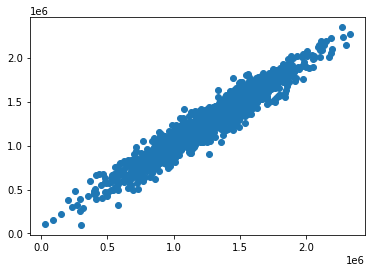

In [ ]:
plt.scatter(y_test,predictions) # test for linear relationship

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81257.55795856068
MSE: 10169125565.897734
RMSE: 100842.08231635111
